# 35_pytorch 기초 - pytorch 보스톤집값예측, 유방암예측

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 보스턴 자료 가져오기
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/newrandom/miniforge3/envs/TF/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [9]:
# DataFrame 만들기
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [10]:
# 학습에 필요한 모듈 import
import torch
import torch.nn as nn
            # nn : neural network
import torch.nn.functional as F
import torch.optim as optim

In [11]:
# 필요한 특성 선택
cols = ['TARGET','INDUS','RM','LSTAT','NOX','DIS']
data = torch.from_numpy(df[cols].values).float()
            # from_numpy : 넘파이를
                                        # float : float 형으로 선언시켜줘야 한다.

data.shape

torch.Size([506, 6])

In [12]:
data
# numpy가 아닌 tensor임

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

In [13]:
# 특성과 라벨로 분리

y = data[:,:1]      # Label
x = data[:,1:]      # feature

print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [14]:
# 하이퍼파라미터
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

In [15]:
# 모델 수립
model = nn.Linear(x.size(-1), y.size(-1))
                # x.size  : in features , 입력
                            # y.size : out_features, 출력
                                        # bias : default True
model

Linear(in_features=5, out_features=1, bias=True)

In [16]:
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

![](./lecture_image/35-01.png)

In [17]:
# 학습 시작

for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
            # 가중치를 0로 하는게 아니고, 미분치를 0로 두는 것.
            
    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0:
        print('Epoch %d : loss=%.4e' % (i + 1, loss))

Epoch 100 : loss=4.2037e+01
Epoch 200 : loss=3.6249e+01
Epoch 300 : loss=3.3081e+01
Epoch 400 : loss=3.1296e+01
Epoch 500 : loss=3.0290e+01
Epoch 600 : loss=2.9722e+01
Epoch 700 : loss=2.9402e+01
Epoch 800 : loss=2.9221e+01
Epoch 900 : loss=2.9119e+01
Epoch 1000 : loss=2.9061e+01
Epoch 1100 : loss=2.9028e+01
Epoch 1200 : loss=2.9009e+01
Epoch 1300 : loss=2.8998e+01
Epoch 1400 : loss=2.8992e+01
Epoch 1500 : loss=2.8988e+01
Epoch 1600 : loss=2.8985e+01
Epoch 1700 : loss=2.8983e+01
Epoch 1800 : loss=2.8982e+01
Epoch 1900 : loss=2.8981e+01
Epoch 2000 : loss=2.8980e+01


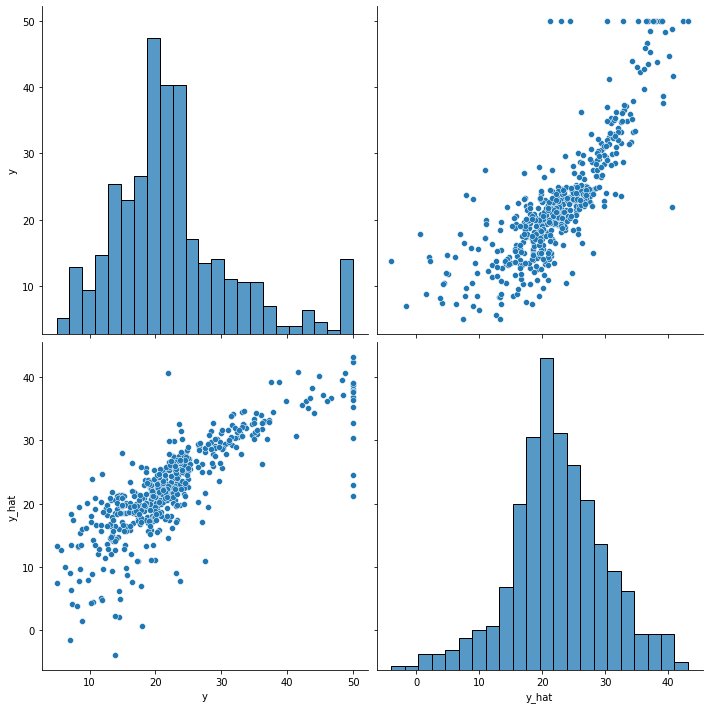

In [18]:
# 학습결과 정리
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=['y', 'y_hat'])

sns.pairplot(df, height=5)
plt.show()

-------------------------

# Cancer 예측

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [21]:
# 데이터 정리
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [24]:
# 관심있는 컬럼을 정리
cols = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
'mean concave points', 'worst radius', 'worst texture', 'worst smoothness', 'worst compactness', 
'worst concave points', 'class']

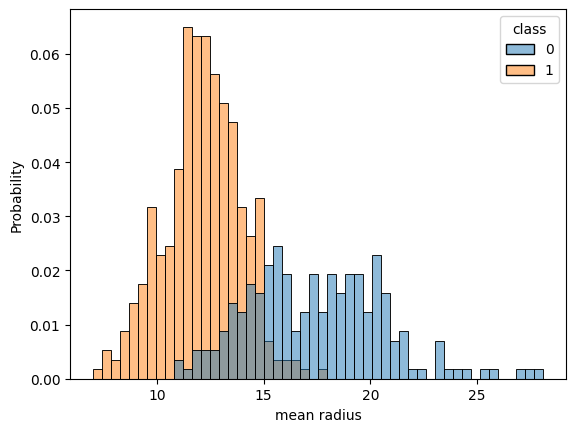

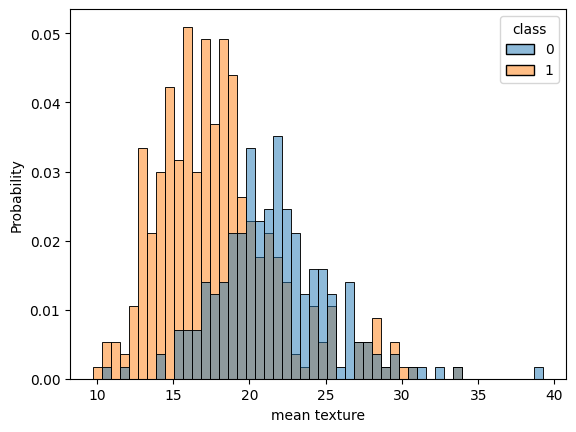

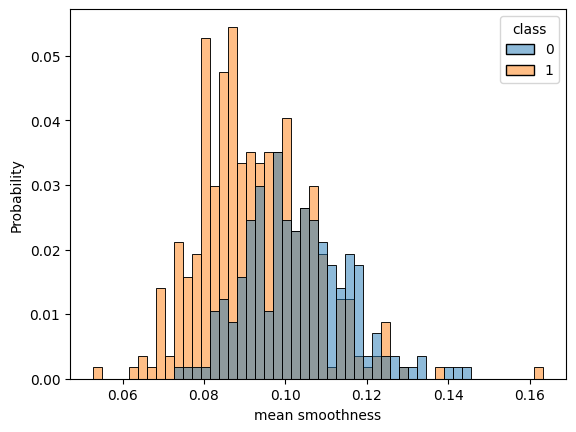

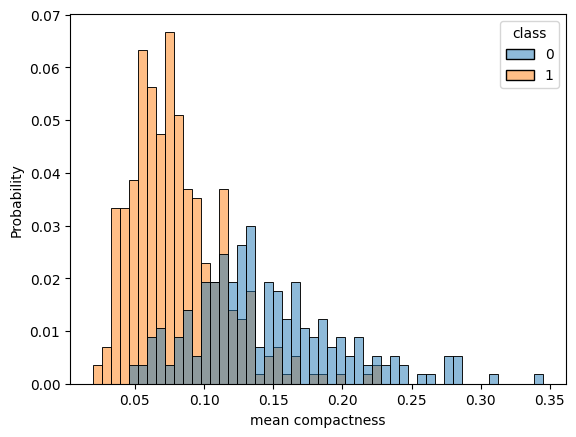

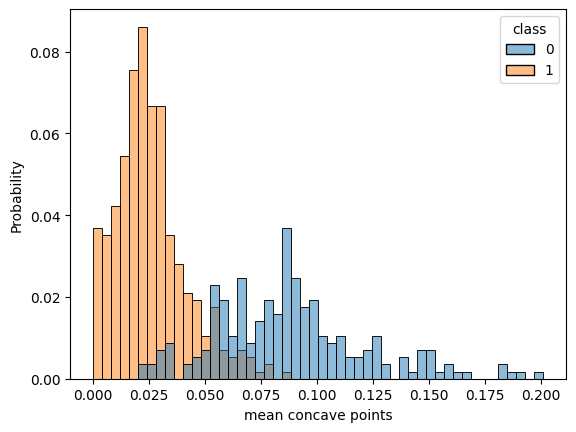

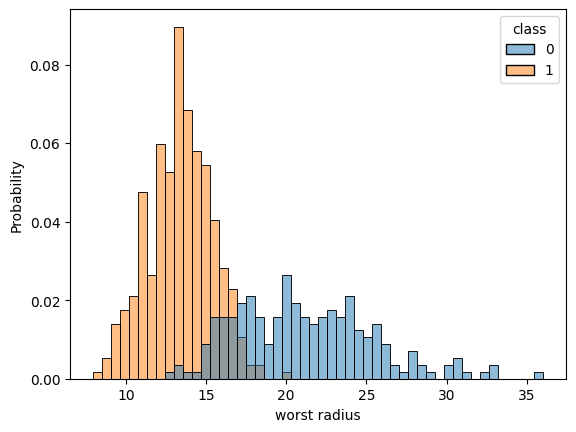

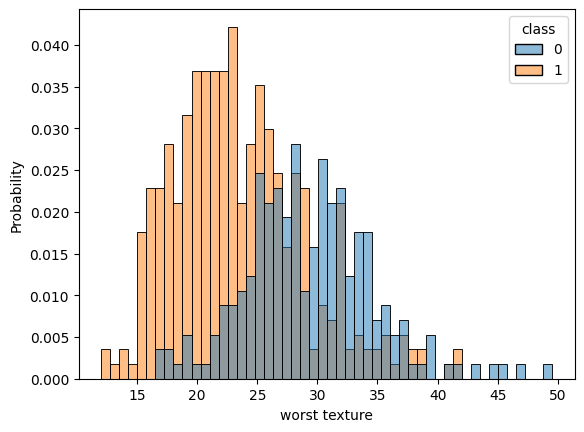

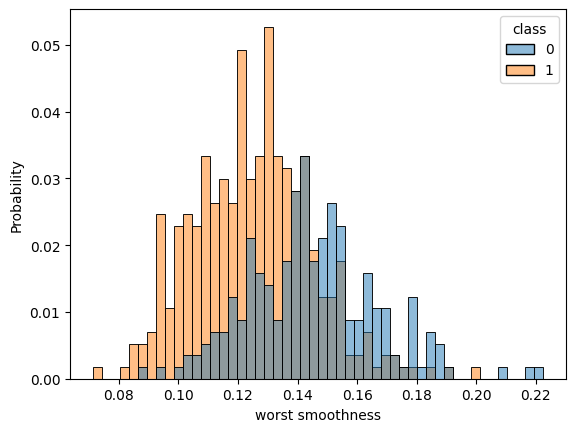

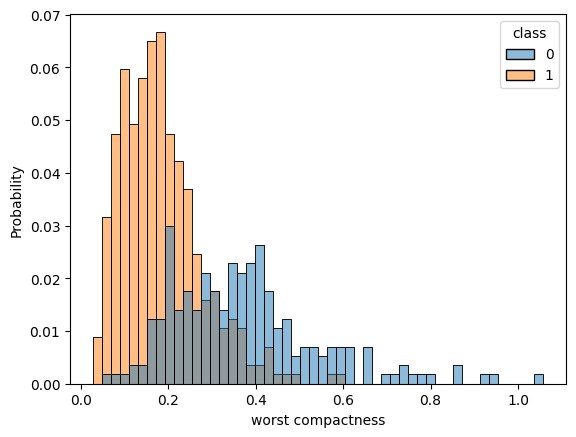

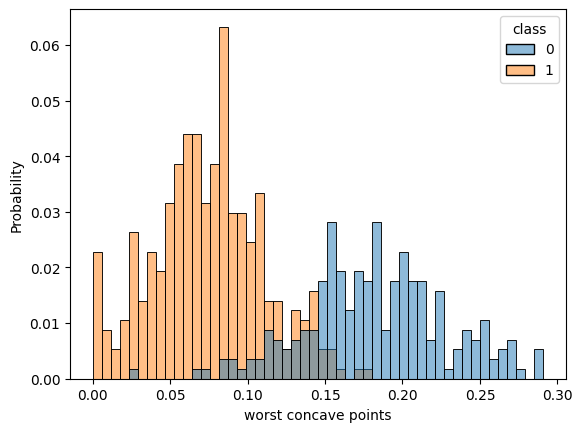

In [25]:
for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

In [26]:
# torch import

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [27]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([569, 11])

In [28]:
# 데이터를 라벨과 특성으로 나누기

x = data[:, :-1]    # Feature
y = data[:, -1:]    # Label

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [29]:
# 하이퍼파라미터 설정
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [31]:
# model 클래스로 만들기
class MyModel(nn.Module):

    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()      
        # super를 해야 nn.module의 속성을 상속받을 수 있다.

        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()
                        # sigmoid : 이진분류이기 때문에

    def forward(self,x):
        # |x| = (batch_size, input_dim)
        y = self.act(self.linear(x))
        # |y| = (batch_size, output_dim)

        return y

In [32]:
# 모델 선언, loss, optim 선언
model = MyModel(input_dim=x.size(-1), output_dim=y.size(-1))
crit = nn.BCELoss() 
            # Define BCELoss instead of MSELoss.
            # Binary Cross Entropy

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [33]:
# 학습 시작
for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat,y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i + 1) % print_interval == 0:
        print('Epoch %d : loss=%.4e' % (i + 1, loss))

Epoch 10000 : loss=2.7482e-01
Epoch 20000 : loss=2.2720e-01
Epoch 30000 : loss=1.9868e-01
Epoch 40000 : loss=1.8001e-01
Epoch 50000 : loss=1.6694e-01
Epoch 60000 : loss=1.5730e-01
Epoch 70000 : loss=1.4990e-01
Epoch 80000 : loss=1.4404e-01
Epoch 90000 : loss=1.3927e-01
Epoch 100000 : loss=1.3532e-01
Epoch 110000 : loss=1.3198e-01
Epoch 120000 : loss=1.2913e-01
Epoch 130000 : loss=1.2665e-01
Epoch 140000 : loss=1.2449e-01
Epoch 150000 : loss=1.2258e-01
Epoch 160000 : loss=1.2087e-01
Epoch 170000 : loss=1.1935e-01
Epoch 180000 : loss=1.1797e-01
Epoch 190000 : loss=1.1672e-01
Epoch 200000 : loss=1.1557e-01


In [34]:
# acc 계산
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy : %.4f' % (correct_cnt / total_cnt))

Accuracy : 0.9666


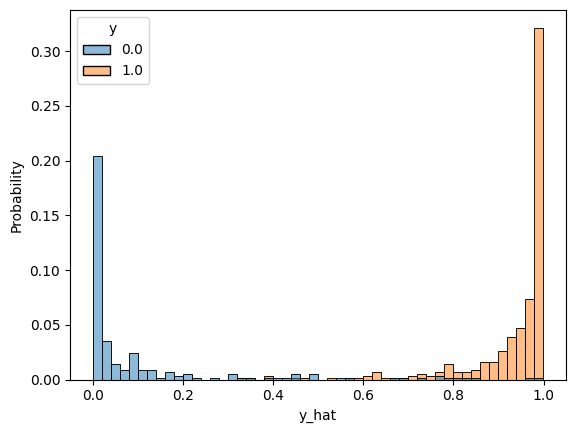

In [35]:
# 예측값의 분포 확인
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=['y', 'y_hat'])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()